In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import random
import plotly.express as px
import time
import seaborn as sns

In [2]:
infile = open('..//3_k-means_clustering//apartment_data_frame_clustered_700','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,voivodeship,localization_y,localization_x,market,area,rooms,floor,floors,build_yr,price,url,price_of_sqm,cluster
0,Warszawa,Wola,mazowieckie,52.245982,20.985385,wtorny,36.00,2,parter,3,1956.0,496000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,13777.777778,682
1,Kraków,Swoszowice,małopolskie,49.991389,19.946389,wtorny,78.32,3,3,3,2014.0,538000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,6869.254341,528
2,Łódź,Śródmieście,łódzkie,51.772914,19.458331,wtorny,60.27,2,2,3,1910.0,270000.0,https://gratka.pl/nieruchomosci/mieszkanie-lod...,4479.840717,113
3,Warszawa,Stara Ochota,mazowieckie,52.218900,20.978800,wtorny,122.00,4,6,7,2020.0,1955000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,16024.590164,257
4,Kraków,Mistrzejowice,małopolskie,50.096196,20.009887,wtorny,48.07,3,3,4,1978.0,384000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,7988.350322,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,Warszawa,Wola,mazowieckie,52.237222,20.960556,pierwotny,109.00,4,12,13,2020.0,1460000.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,13394.495413,33
54463,Warszawa,Wola,mazowieckie,52.237222,20.960556,wtorny,82.60,4,4,5,2020.0,885000.0,https://gratka.pl/nieruchomosci/4-pokojowe-got...,10714.285714,33
54464,Poznań,Grunwald,wielkopolskie,52.392626,16.846137,wtorny,68.25,3,parter,4,2009.0,540000.0,https://gratka.pl/nieruchomosci/mieszkanie-poz...,7912.087912,6
54465,Kraków,Os. Prądnik Czerwony,małopolskie,50.088513,19.958912,wtorny,45.00,2,2,10,2019.0,610000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,13555.555556,144


## data preparation for ann

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            54467 non-null  object 
 1   district        54467 non-null  object 
 2   voivodeship     46557 non-null  object 
 3   localization_y  54467 non-null  float64
 4   localization_x  54467 non-null  float64
 5   market          54467 non-null  object 
 6   area            54467 non-null  float64
 7   rooms           54467 non-null  object 
 8   floor           54467 non-null  object 
 9   floors          54467 non-null  object 
 10  build_yr        54467 non-null  float64
 11  price           54467 non-null  float64
 12  url             54467 non-null  object 
 13  price_of_sqm    54467 non-null  float64
 14  cluster         54467 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 6.0+ MB


In [5]:
frame = frame.drop(['city','district','voivodeship','localization_y','localization_x','area','price','url'],axis=1)

In [6]:
frame.cluster = frame.cluster.apply(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market        54467 non-null  object 
 1   rooms         54467 non-null  object 
 2   floor         54467 non-null  object 
 3   floors        54467 non-null  object 
 4   build_yr      54467 non-null  float64
 5   price_of_sqm  54467 non-null  float64
 6   cluster       54467 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.9+ MB


## creating dummy variables

In [8]:
dummies = pd.get_dummies(frame[['market','rooms','floor','floors','cluster']],drop_first=True)
frame = frame.drop(['market','rooms','floor','floors','cluster'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [9]:
frame

,build_yr,price_of_sqm,market_wtorny,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,1956.0,13777.777778,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014.0,6869.254341,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1910.0,4479.840717,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020.0,16024.590164,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1978.0,7988.350322,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,2020.0,13394.495413,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54463,2020.0,10714.285714,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54464,2009.0,7912.087912,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54465,2019.0,13555.555556,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
X = frame.drop('price_of_sqm',axis=1).values
y = frame.price_of_sqm.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train= scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(40850, 773)

In [18]:
X_test.shape

(13617, 773)

In [19]:
X_train

array([[0.98484848, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98484848, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.93939394, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.98106061, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.92045455, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98484848, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## creating model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=X_test.shape[1]))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error',random_state=0)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12384     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 12,873
Trainable params: 12,873
Non-trainable params: 0
_________________________________________________________________


In [23]:
# from tensorflow.keras.callbacks import EarlyStopping

In [24]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [25]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=5000,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 40850 samples, validate on 13617 samples
Epoch 1/5000
40850/40850 [==============================] - 2s 39us/sample - loss: 101805999.7055 - val_loss: 100562697.1245
Epoch 2/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 89767407.9362 - val_loss: 67025874.0627
Epoch 3/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 34665663.3103 - val_loss: 16512214.3872
Epoch 4/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 15596802.5836 - val_loss: 14566254.4162
Epoch 5/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 14091829.3715 - val_loss: 13284807.9283
Epoch 6/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 12906454.3365 - val_loss: 12217198.4068
Epoch 7/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 11892545.5457 - val_loss: 11278365.7597
Epoch 8/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 1098

40850/40850 [==============================] - 1s 14us/sample - loss: 5229126.4025 - val_loss: 5428844.7421
Epoch 68/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5225711.1886 - val_loss: 5429378.0677
Epoch 69/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5225721.6584 - val_loss: 5437387.2668
Epoch 70/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5225630.5758 - val_loss: 5441894.0705
Epoch 71/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5222334.6694 - val_loss: 5422156.9286
Epoch 72/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5217702.2676 - val_loss: 5423031.4718
Epoch 73/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5215403.7094 - val_loss: 5421932.0293
Epoch 74/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5210894.5503 - val_loss: 5427568.3879
Epoch 75/5000
40850/40850 [===========

Epoch 134/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5110447.4552 - val_loss: 5335454.4798
Epoch 135/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5112737.1264 - val_loss: 5332580.2214
Epoch 136/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 5106827.2451 - val_loss: 5328056.6659
Epoch 137/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5104008.0630 - val_loss: 5333905.4616
Epoch 138/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5103575.8506 - val_loss: 5325479.9662
Epoch 139/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 5105251.7284 - val_loss: 5329488.8444
Epoch 140/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 5104552.4822 - val_loss: 5332849.1742
Epoch 141/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5101565.0333 - val_loss: 5323060.7550
Epoch 142/5000
4

40850/40850 [==============================] - 1s 17us/sample - loss: 5053897.7049 - val_loss: 5291109.2522
Epoch 201/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 5055217.4699 - val_loss: 5291650.9255
Epoch 202/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 5055054.2030 - val_loss: 5288348.9717
Epoch 203/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 5054125.1630 - val_loss: 5288012.9768
Epoch 204/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 5055225.8565 - val_loss: 5286632.0384
Epoch 205/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 5052541.2009 - val_loss: 5287096.9813
Epoch 206/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 5052793.3913 - val_loss: 5287132.8672
Epoch 207/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 5054108.9611 - val_loss: 5286242.0551
Epoch 208/5000
40850/40850 [===

40850/40850 [==============================] - 1s 14us/sample - loss: 5024856.5878 - val_loss: 5264436.0278
Epoch 267/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5024529.4373 - val_loss: 5261884.1494
Epoch 268/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5029076.0492 - val_loss: 5265455.3212
Epoch 269/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5023975.4219 - val_loss: 5258897.4251
Epoch 270/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5024036.5971 - val_loss: 5262377.9660
Epoch 271/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5024051.2890 - val_loss: 5259752.4751
Epoch 272/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5024742.0786 - val_loss: 5254218.5139
Epoch 273/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5024901.5345 - val_loss: 5253385.3919
Epoch 274/5000
40850/40850 [===

40850/40850 [==============================] - 1s 14us/sample - loss: 5010880.9776 - val_loss: 5235496.3318
Epoch 333/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5009704.8352 - val_loss: 5234392.2332
Epoch 334/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5011153.9772 - val_loss: 5241552.7378
Epoch 335/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5009030.3075 - val_loss: 5238712.5412
Epoch 336/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5009075.8930 - val_loss: 5232875.1644
Epoch 337/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5010093.0533 - val_loss: 5238161.1531
Epoch 338/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5008913.0637 - val_loss: 5242859.7457
Epoch 339/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5007820.3095 - val_loss: 5233631.2088
Epoch 340/5000
40850/40850 [===

40850/40850 [==============================] - 1s 16us/sample - loss: 4986341.3427 - val_loss: 5214539.7442
Epoch 399/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4986309.9510 - val_loss: 5217378.7403
Epoch 400/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4982006.8510 - val_loss: 5212064.2516
Epoch 401/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4984387.0587 - val_loss: 5216514.9764
Epoch 402/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4984487.7132 - val_loss: 5208753.8341
Epoch 403/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4980519.5417 - val_loss: 5243406.4139
Epoch 404/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4983928.9215 - val_loss: 5210907.2697
Epoch 405/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4979296.4862 - val_loss: 5211407.3035
Epoch 406/5000
40850/40850 [===

40850/40850 [==============================] - 1s 14us/sample - loss: 4949846.5866 - val_loss: 5185471.8383
Epoch 465/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4951639.8689 - val_loss: 5183626.8209
Epoch 466/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4950110.7567 - val_loss: 5205738.9990
Epoch 467/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4952960.3367 - val_loss: 5181868.0787
Epoch 468/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4947402.0720 - val_loss: 5183327.8006
Epoch 469/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4949556.2983 - val_loss: 5191545.7087
Epoch 470/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4945487.1261 - val_loss: 5181837.2118
Epoch 471/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4944834.6526 - val_loss: 5193699.2182
Epoch 472/5000
40850/40850 [===

40850/40850 [==============================] - 1s 16us/sample - loss: 4900034.7653 - val_loss: 5148627.6274
Epoch 531/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4898810.3850 - val_loss: 5154016.8060
Epoch 532/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4901682.2772 - val_loss: 5147623.3186
Epoch 533/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4897216.5200 - val_loss: 5148828.5830
Epoch 534/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4897159.4125 - val_loss: 5161314.2232
Epoch 535/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4897028.1052 - val_loss: 5146636.1166
Epoch 536/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4898802.6321 - val_loss: 5152378.1297
Epoch 537/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4896873.5370 - val_loss: 5146471.3260
Epoch 538/5000
40850/40850 [===

40850/40850 [==============================] - 1s 13us/sample - loss: 4877417.5940 - val_loss: 5133157.0138
Epoch 597/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4877260.6125 - val_loss: 5140822.1828
Epoch 598/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4876431.9747 - val_loss: 5135643.8431
Epoch 599/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4878065.4843 - val_loss: 5138129.0965
Epoch 600/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4878914.7783 - val_loss: 5134813.5127
Epoch 601/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4877923.4534 - val_loss: 5134622.5610
Epoch 602/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4876881.1140 - val_loss: 5137558.8361
Epoch 603/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4876490.5650 - val_loss: 5136184.7183
Epoch 604/5000
40850/40850 [===

40850/40850 [==============================] - 1s 16us/sample - loss: 4863758.4277 - val_loss: 5150587.2396
Epoch 663/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4862137.2309 - val_loss: 5136207.1207
Epoch 664/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4859249.8676 - val_loss: 5129336.0956
Epoch 665/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4858581.9755 - val_loss: 5141053.7843
Epoch 666/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4859700.2260 - val_loss: 5130100.6521
Epoch 667/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4861539.2526 - val_loss: 5130533.6367
Epoch 668/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4858466.5008 - val_loss: 5133906.2908
Epoch 669/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4858844.3065 - val_loss: 5129332.7916
Epoch 670/5000
40850/40850 [===

40850/40850 [==============================] - 1s 16us/sample - loss: 4842099.3856 - val_loss: 5127096.7836
Epoch 729/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4842348.0666 - val_loss: 5125390.0369
Epoch 730/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4842885.4103 - val_loss: 5120963.4846
Epoch 731/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4842745.4014 - val_loss: 5119211.2862
Epoch 732/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4839874.6826 - val_loss: 5119349.3202
Epoch 733/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4840461.0244 - val_loss: 5120603.1578
Epoch 734/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4840885.8593 - val_loss: 5120761.2527
Epoch 735/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4840581.5658 - val_loss: 5145069.1468
Epoch 736/5000
40850/40850 [===

40850/40850 [==============================] - 1s 14us/sample - loss: 4826397.0792 - val_loss: 5109062.3673
Epoch 795/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4827087.5984 - val_loss: 5114558.8741
Epoch 796/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4829862.6085 - val_loss: 5137761.4633
Epoch 797/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4828585.0722 - val_loss: 5125108.4001
Epoch 798/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4827760.6352 - val_loss: 5109290.4943
Epoch 799/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4823721.4758 - val_loss: 5152568.9442
Epoch 800/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4829673.2179 - val_loss: 5109577.2529
Epoch 801/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4826225.3145 - val_loss: 5112480.3776
Epoch 802/5000
40850/40850 [===

40850/40850 [==============================] - 1s 17us/sample - loss: 4815520.3092 - val_loss: 5102576.0991
Epoch 861/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4812013.7300 - val_loss: 5102771.1216
Epoch 862/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4813256.0312 - val_loss: 5102396.4484
Epoch 863/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4814959.6793 - val_loss: 5108899.8843
Epoch 864/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4811526.5335 - val_loss: 5107243.8770
Epoch 865/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4812538.7732 - val_loss: 5102115.2180
Epoch 866/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4812218.6685 - val_loss: 5103570.2599
Epoch 867/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4812458.5469 - val_loss: 5105617.4962
Epoch 868/5000
40850/40850 [===

40850/40850 [==============================] - 1s 15us/sample - loss: 4785250.2470 - val_loss: 5080768.7849
Epoch 927/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4783691.5449 - val_loss: 5075872.4948
Epoch 928/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4782895.2729 - val_loss: 5078681.5848
Epoch 929/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4781737.7860 - val_loss: 5082043.0287
Epoch 930/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4781457.5104 - val_loss: 5072151.9944
Epoch 931/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4781738.4958 - val_loss: 5095669.5574
Epoch 932/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4782576.7418 - val_loss: 5073577.1959
Epoch 933/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4780712.8231 - val_loss: 5077306.2837
Epoch 934/5000
40850/40850 [===

40850/40850 [==============================] - 1s 15us/sample - loss: 4750624.0024 - val_loss: 5062577.6723
Epoch 993/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4751774.4024 - val_loss: 5059118.9968
Epoch 994/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4751390.2663 - val_loss: 5051432.2449
Epoch 995/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4752662.1165 - val_loss: 5050813.6707
Epoch 996/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4753651.1679 - val_loss: 5050221.4875
Epoch 997/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4751459.5468 - val_loss: 5061180.7192
Epoch 998/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4754527.1083 - val_loss: 5060217.6181
Epoch 999/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4750081.6098 - val_loss: 5054392.6891
Epoch 1000/5000
40850/40850 [==

40850/40850 [==============================] - 1s 14us/sample - loss: 4731863.3683 - val_loss: 5034396.7523
Epoch 1059/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4727831.6223 - val_loss: 5046424.0229
Epoch 1060/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4729894.1664 - val_loss: 5040484.4007
Epoch 1061/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4731004.2853 - val_loss: 5070274.9226
Epoch 1062/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4732771.9464 - val_loss: 5041177.8739
Epoch 1063/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4731409.0133 - val_loss: 5068078.3681
Epoch 1064/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4729806.8156 - val_loss: 5040354.1904
Epoch 1065/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4728106.7230 - val_loss: 5035784.0142
Epoch 1066/5000
40850/40

40850/40850 [==============================] - 1s 20us/sample - loss: 4714400.9455 - val_loss: 5028345.5332
Epoch 1125/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 4709958.5974 - val_loss: 5018259.2043
Epoch 1126/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4709585.6098 - val_loss: 5018576.9143
Epoch 1127/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4710889.3165 - val_loss: 5028375.3786
Epoch 1128/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4715516.2995 - val_loss: 5013889.9496
Epoch 1129/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4708636.5337 - val_loss: 5021268.1547
Epoch 1130/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4709551.0935 - val_loss: 5015757.5360
Epoch 1131/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4710365.2638 - val_loss: 5014738.8085
Epoch 1132/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 4683145.8220 - val_loss: 4995209.9960
Epoch 1191/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4684328.4027 - val_loss: 4993407.9247
Epoch 1192/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4682181.4602 - val_loss: 4993561.4133
Epoch 1193/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4684147.4459 - val_loss: 4990725.2961
Epoch 1194/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4683465.1729 - val_loss: 4992969.3731
Epoch 1195/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4682517.8851 - val_loss: 4997137.4172
Epoch 1196/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4682209.3387 - val_loss: 4995625.6601
Epoch 1197/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4685038.6576 - val_loss: 5003608.4978
Epoch 1198/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4660157.9210 - val_loss: 4978163.6897
Epoch 1257/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4661479.6589 - val_loss: 4982160.3104
Epoch 1258/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4660311.2168 - val_loss: 4977638.2082
Epoch 1259/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4659870.6343 - val_loss: 4972666.2860
Epoch 1260/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4661219.7395 - val_loss: 4971737.4051
Epoch 1261/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4658608.8061 - val_loss: 4975615.6549
Epoch 1262/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4660130.8414 - val_loss: 4972491.6921
Epoch 1263/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4661305.6937 - val_loss: 5004650.9369
Epoch 1264/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 4645702.5842 - val_loss: 4971032.9625
Epoch 1323/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4646555.1551 - val_loss: 4974093.0206
Epoch 1324/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4646018.8091 - val_loss: 4968030.7403
Epoch 1325/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4646675.5592 - val_loss: 4973307.9512
Epoch 1326/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4644160.0347 - val_loss: 4971874.9753
Epoch 1327/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4644391.5295 - val_loss: 4968347.4896
Epoch 1328/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4644932.5034 - val_loss: 4967214.7216
Epoch 1329/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4646588.8569 - val_loss: 4972285.8105
Epoch 1330/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 4635960.9747 - val_loss: 4967012.2349
Epoch 1389/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4635043.3005 - val_loss: 4978595.7434
Epoch 1390/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4635845.4771 - val_loss: 4969471.2065
Epoch 1391/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4636066.3504 - val_loss: 4975103.7141
Epoch 1392/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4636196.1162 - val_loss: 4962542.6820
Epoch 1393/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4636082.4021 - val_loss: 4962491.0280
Epoch 1394/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4635490.9242 - val_loss: 4962241.1770
Epoch 1395/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 4634471.9992 - val_loss: 4983450.9184
Epoch 1396/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 4623723.1713 - val_loss: 4956634.0859
Epoch 1455/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4622602.9361 - val_loss: 4955666.8543
Epoch 1456/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4622975.7753 - val_loss: 4958288.0863
Epoch 1457/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4621473.3728 - val_loss: 4957886.9959
Epoch 1458/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4623886.7159 - val_loss: 4959508.7640
Epoch 1459/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4623779.1487 - val_loss: 4955021.4062
Epoch 1460/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4626178.8214 - val_loss: 4956669.0987
Epoch 1461/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4620615.0706 - val_loss: 4983628.2458
Epoch 1462/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 4611624.0940 - val_loss: 4958254.6178
Epoch 1521/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4612650.7069 - val_loss: 4953297.9441
Epoch 1522/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4613357.8104 - val_loss: 4985383.1577
Epoch 1523/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4616514.5024 - val_loss: 4948017.6013
Epoch 1524/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4615798.3316 - val_loss: 4962153.5024
Epoch 1525/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4611561.3769 - val_loss: 4950984.3007
Epoch 1526/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4613290.3037 - val_loss: 4946050.3023
Epoch 1527/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4615497.4606 - val_loss: 4965055.9338
Epoch 1528/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 4598071.4697 - val_loss: 4935169.5761
Epoch 1587/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4598331.5283 - val_loss: 4933167.4492
Epoch 1588/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4598181.2570 - val_loss: 4940060.6627
Epoch 1589/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4598411.0045 - val_loss: 4937528.9817
Epoch 1590/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4599320.4671 - val_loss: 4942319.7618
Epoch 1591/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4598708.2482 - val_loss: 4930659.0900
Epoch 1592/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4596432.1691 - val_loss: 4956416.8865
Epoch 1593/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4598198.7457 - val_loss: 4938988.5935
Epoch 1594/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4585546.6177 - val_loss: 4928451.4232
Epoch 1653/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4585023.3024 - val_loss: 4924258.5648
Epoch 1654/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4588215.0796 - val_loss: 4936511.6260
Epoch 1655/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4584848.9861 - val_loss: 4926226.1831
Epoch 1656/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4588319.3140 - val_loss: 4926440.4210
Epoch 1657/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4584291.7976 - val_loss: 4923968.5932
Epoch 1658/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4584210.7650 - val_loss: 4942173.4060
Epoch 1659/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4585759.6671 - val_loss: 4948593.7835
Epoch 1660/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 4576422.5860 - val_loss: 4943119.5102
Epoch 1719/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4576241.0792 - val_loss: 4940644.1388
Epoch 1720/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4576867.8586 - val_loss: 4922624.5930
Epoch 1721/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4577094.1358 - val_loss: 4920098.0038
Epoch 1722/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4576939.3172 - val_loss: 4920763.5405
Epoch 1723/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4578684.6639 - val_loss: 4919158.2858
Epoch 1724/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4574648.5335 - val_loss: 4922862.5334
Epoch 1725/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4574245.2410 - val_loss: 4936242.6159
Epoch 1726/5000
40850/40

Epoch 1784/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4563602.1356 - val_loss: 4907204.6135
Epoch 1785/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4563802.2407 - val_loss: 4912505.5675
Epoch 1786/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4560995.0982 - val_loss: 4911652.9263
Epoch 1787/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4564230.3925 - val_loss: 4909590.3331
Epoch 1788/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4564296.5206 - val_loss: 4914842.2060
Epoch 1789/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4563390.8957 - val_loss: 4908216.6704
Epoch 1790/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4560811.8233 - val_loss: 4912078.4432
Epoch 1791/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4565133.3339 - val_loss: 4909877.4117
Epoch 17

40850/40850 [==============================] - 1s 14us/sample - loss: 4551791.4251 - val_loss: 4900912.7575
Epoch 1851/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4552682.2899 - val_loss: 4901579.7193
Epoch 1852/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4554233.1511 - val_loss: 4901473.7767
Epoch 1853/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4554581.7353 - val_loss: 4913725.6912
Epoch 1854/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4554214.6100 - val_loss: 4904843.8298
Epoch 1855/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4551897.8682 - val_loss: 4905854.8833
Epoch 1856/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4552185.0924 - val_loss: 4902153.2755
Epoch 1857/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4553334.0053 - val_loss: 4900017.9455
Epoch 1858/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 4542847.8960 - val_loss: 4896435.4265
Epoch 1917/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4543695.1586 - val_loss: 4899884.9162
Epoch 1918/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4543897.3555 - val_loss: 4898297.4878
Epoch 1919/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4544958.7192 - val_loss: 4908356.6997
Epoch 1920/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4545029.0162 - val_loss: 4897907.0654
Epoch 1921/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4543182.7114 - val_loss: 4913638.0087
Epoch 1922/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4541084.4825 - val_loss: 4894342.6318
Epoch 1923/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4541299.3105 - val_loss: 4894019.3569
Epoch 1924/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 4535054.2299 - val_loss: 4887840.3404
Epoch 1983/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4534585.7380 - val_loss: 4887724.1339
Epoch 1984/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4533876.3634 - val_loss: 4889350.3688
Epoch 1985/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4535116.2816 - val_loss: 4889855.7569
Epoch 1986/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4535599.6782 - val_loss: 4885184.4887
Epoch 1987/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4536064.6279 - val_loss: 4886268.4436
Epoch 1988/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4535259.6529 - val_loss: 4887168.2837
Epoch 1989/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4536091.3468 - val_loss: 4917142.7289
Epoch 1990/5000
40850/40

40850/40850 [==============================] - 1s 18us/sample - loss: 4521156.0094 - val_loss: 4882322.3128
Epoch 2049/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4521779.4708 - val_loss: 4879099.6792
Epoch 2050/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4521336.2291 - val_loss: 4887064.3252
Epoch 2051/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4521233.7652 - val_loss: 4883566.9752
Epoch 2052/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4521462.0483 - val_loss: 4880038.0875
Epoch 2053/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4521133.1507 - val_loss: 4911706.1113
Epoch 2054/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4522320.2284 - val_loss: 4898099.1228
Epoch 2055/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4521359.0420 - val_loss: 4882886.9918
Epoch 2056/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4489038.3409 - val_loss: 4876186.0348
Epoch 2115/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4483664.2673 - val_loss: 4852641.3267
Epoch 2116/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4480910.2613 - val_loss: 4855651.0556
Epoch 2117/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4481340.7674 - val_loss: 4856965.8188
Epoch 2118/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4477856.5213 - val_loss: 4860548.1316
Epoch 2119/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4473035.3470 - val_loss: 4845877.5824
Epoch 2120/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4472321.0677 - val_loss: 4865116.7973
Epoch 2121/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4475024.4337 - val_loss: 4843399.0441
Epoch 2122/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 4340589.5202 - val_loss: 4752950.9012
Epoch 2181/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4333958.7824 - val_loss: 4747673.1331
Epoch 2182/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4330965.4170 - val_loss: 4752172.6077
Epoch 2183/5000
40850/40850 [==============================] - 1s 20us/sample - loss: 4330849.2050 - val_loss: 4761940.4165
Epoch 2184/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4327284.8666 - val_loss: 4750428.4490
Epoch 2185/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4327477.0175 - val_loss: 4758832.2959
Epoch 2186/5000
40850/40850 [==============================] - 1s 28us/sample - loss: 4329947.7649 - val_loss: 4744253.9336
Epoch 2187/5000
40850/40850 [==============================] - 1s 24us/sample - loss: 4326688.4908 - val_loss: 4755148.6980
Epoch 2188/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 4267915.6331 - val_loss: 4705081.6115
Epoch 2247/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4271371.6073 - val_loss: 4705352.0010
Epoch 2248/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4263761.2012 - val_loss: 4709549.0677
Epoch 2249/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4264811.9360 - val_loss: 4714569.0418
Epoch 2250/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4267641.3903 - val_loss: 4709320.3973
Epoch 2251/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4261632.1868 - val_loss: 4704520.9866
Epoch 2252/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4261696.7834 - val_loss: 4724181.0992
Epoch 2253/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4264209.1797 - val_loss: 4711800.3539
Epoch 2254/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 4235428.8871 - val_loss: 4689055.5264
Epoch 2313/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4233993.9707 - val_loss: 4687727.7951
Epoch 2314/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4234163.4758 - val_loss: 4692076.0177
Epoch 2315/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4231942.3285 - val_loss: 4698868.7479
Epoch 2316/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4229550.3110 - val_loss: 4701273.0759
Epoch 2317/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4231413.3565 - val_loss: 4690062.4594
Epoch 2318/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4227984.7652 - val_loss: 4685734.6550
Epoch 2319/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4229356.0934 - val_loss: 4696761.5383
Epoch 2320/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 4214691.3049 - val_loss: 4682884.4609
Epoch 2379/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4212064.5824 - val_loss: 4677392.4672
Epoch 2380/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4209919.3261 - val_loss: 4677301.2948
Epoch 2381/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4215077.2951 - val_loss: 4695961.5505
Epoch 2382/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4208077.8250 - val_loss: 4682992.8972
Epoch 2383/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4213759.8116 - val_loss: 4674627.4490
Epoch 2384/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4211074.8883 - val_loss: 4677599.8593
Epoch 2385/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4207886.3872 - val_loss: 4687497.1025
Epoch 2386/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 4186378.3696 - val_loss: 4660209.9846
Epoch 2445/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4188382.6373 - val_loss: 4671952.8851
Epoch 2446/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4186075.7312 - val_loss: 4659496.3462
Epoch 2447/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4184752.7418 - val_loss: 4669634.1901
Epoch 2448/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4189332.8936 - val_loss: 4655907.1451
Epoch 2449/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4188597.6971 - val_loss: 4660788.3719
Epoch 2450/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4187319.6999 - val_loss: 4667695.2907
Epoch 2451/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4185282.2318 - val_loss: 4656686.8841
Epoch 2452/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 4153509.6705 - val_loss: 4665483.7427
Epoch 2511/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4153932.6050 - val_loss: 4644484.6351
Epoch 2512/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4151463.0671 - val_loss: 4643228.7842
Epoch 2513/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4152291.7101 - val_loss: 4638595.4656
Epoch 2514/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4150479.2614 - val_loss: 4671119.8355
Epoch 2515/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4156460.8114 - val_loss: 4641224.6814
Epoch 2516/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4151836.9572 - val_loss: 4636712.0635
Epoch 2517/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4151013.2643 - val_loss: 4643701.4082
Epoch 2518/5000
40850/40

Epoch 2576/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4129441.0806 - val_loss: 4635880.1928
Epoch 2577/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4126551.4379 - val_loss: 4631437.7516
Epoch 2578/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4127510.3634 - val_loss: 4636107.1807
Epoch 2579/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4125998.0490 - val_loss: 4631854.7774
Epoch 2580/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4123400.8330 - val_loss: 4631515.9636
Epoch 2581/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4123520.4894 - val_loss: 4632321.7776
Epoch 2582/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4127117.6122 - val_loss: 4637105.7615
Epoch 2583/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4125376.5580 - val_loss: 4629385.1941
Epoch 25

40850/40850 [==============================] - 1s 14us/sample - loss: 4104570.6006 - val_loss: 4638209.5324
Epoch 2643/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4108100.6929 - val_loss: 4644148.1106
Epoch 2644/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4099604.8492 - val_loss: 4635225.9417
Epoch 2645/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4102153.5017 - val_loss: 4629530.9823
Epoch 2646/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4102717.0148 - val_loss: 4631866.6024
Epoch 2647/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4104486.5865 - val_loss: 4622156.8028
Epoch 2648/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4101777.3985 - val_loss: 4662302.6905
Epoch 2649/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4104346.8341 - val_loss: 4629334.7236
Epoch 2650/5000
40850/40

Epoch 2708/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4086637.6415 - val_loss: 4617805.8406
Epoch 2709/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4084236.7219 - val_loss: 4623407.2225
Epoch 2710/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4084224.8647 - val_loss: 4615187.0119
Epoch 2711/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4086317.4855 - val_loss: 4633383.2305
Epoch 2712/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4088261.3070 - val_loss: 4628265.0644
Epoch 2713/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4083270.1969 - val_loss: 4625596.1415
Epoch 2714/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4084304.9685 - val_loss: 4628000.3892
Epoch 2715/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4082385.3295 - val_loss: 4618246.8687
Epoch 27

40850/40850 [==============================] - 1s 17us/sample - loss: 4064717.8176 - val_loss: 4629364.8948
Epoch 2775/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4064934.0435 - val_loss: 4626990.4011
Epoch 2776/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4063177.5386 - val_loss: 4622579.5520
Epoch 2777/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4065442.4160 - val_loss: 4621804.2524
Epoch 2778/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4065681.5129 - val_loss: 4624226.5006
Epoch 2779/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4061229.0689 - val_loss: 4626501.8390
Epoch 2780/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4064619.9669 - val_loss: 4629733.5233
Epoch 2781/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4059710.6674 - val_loss: 4627905.5248
Epoch 2782/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4044676.9634 - val_loss: 4610389.4403
Epoch 2841/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4039212.4575 - val_loss: 4612339.5012
Epoch 2842/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4039248.3361 - val_loss: 4615656.6081
Epoch 2843/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4039940.1447 - val_loss: 4614519.2161
Epoch 2844/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4037206.8693 - val_loss: 4609935.2708
Epoch 2845/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4036546.5088 - val_loss: 4615286.9187
Epoch 2846/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4038387.6480 - val_loss: 4620239.9069
Epoch 2847/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4036868.9912 - val_loss: 4626213.9524
Epoch 2848/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 4015001.8941 - val_loss: 4613909.4236
Epoch 2907/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4016129.4334 - val_loss: 4618438.7604
Epoch 2908/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4011685.0712 - val_loss: 4615832.3667
Epoch 2909/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4012947.8667 - val_loss: 4614575.0457
Epoch 2910/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4014666.9763 - val_loss: 4618687.0744
Epoch 2911/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4016204.9317 - val_loss: 4613399.2297
Epoch 2912/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4012298.9428 - val_loss: 4638821.2003
Epoch 2913/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4017852.3970 - val_loss: 4619561.4705
Epoch 2914/5000
40850/40

40850/40850 [==============================] - 1s 19us/sample - loss: 3990594.8437 - val_loss: 4622090.3622
Epoch 2973/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3993880.1416 - val_loss: 4626165.3553
Epoch 2974/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3992109.3501 - val_loss: 4641919.1714
Epoch 2975/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3990993.2412 - val_loss: 4634511.7284
Epoch 2976/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3992659.4380 - val_loss: 4629481.9323
Epoch 2977/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3992813.1690 - val_loss: 4629682.6490
Epoch 2978/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3990906.1957 - val_loss: 4624860.9025
Epoch 2979/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3993398.0460 - val_loss: 4630284.2105
Epoch 2980/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 3968378.1793 - val_loss: 4635820.2936
Epoch 3039/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3971058.3674 - val_loss: 4631574.4437
Epoch 3040/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3967321.0671 - val_loss: 4628010.7599
Epoch 3041/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3968464.0182 - val_loss: 4641335.1020
Epoch 3042/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3967318.1164 - val_loss: 4638353.4849
Epoch 3043/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3971235.2979 - val_loss: 4633520.1955
Epoch 3044/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3966926.0736 - val_loss: 4639882.0049
Epoch 3045/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3967202.5359 - val_loss: 4636392.0926
Epoch 3046/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3949879.7825 - val_loss: 4654217.3273
Epoch 3105/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3945047.6190 - val_loss: 4640202.0693
Epoch 3106/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3947107.3524 - val_loss: 4653701.1326
Epoch 3107/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3946754.1547 - val_loss: 4642988.0905
Epoch 3108/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3947412.3141 - val_loss: 4636481.1484
Epoch 3109/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3944977.3087 - val_loss: 4660596.3438
Epoch 3110/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3943941.0887 - val_loss: 4690898.3437
Epoch 3111/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3948084.7136 - val_loss: 4628094.5881
Epoch 3112/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 3931612.1006 - val_loss: 4641196.2009
Epoch 3171/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3929235.2548 - val_loss: 4644556.7444
Epoch 3172/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3931813.1860 - val_loss: 4642823.6463
Epoch 3173/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3931786.9419 - val_loss: 4641084.9382
Epoch 3174/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3927323.2506 - val_loss: 4643994.0502
Epoch 3175/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3928608.2291 - val_loss: 4648089.5343
Epoch 3176/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3924305.6928 - val_loss: 4642130.3101
Epoch 3177/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3926855.6115 - val_loss: 4677877.8420
Epoch 3178/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3914355.9203 - val_loss: 4659770.9941
Epoch 3237/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3912477.9935 - val_loss: 4646416.1226
Epoch 3238/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3909259.9097 - val_loss: 4639063.4036
Epoch 3239/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3915347.7868 - val_loss: 4653328.4163
Epoch 3240/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3909062.2430 - val_loss: 4651995.1985
Epoch 3241/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3910665.9282 - val_loss: 4650418.1653
Epoch 3242/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3906673.1045 - val_loss: 4645313.5817
Epoch 3243/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3909448.4117 - val_loss: 4649581.0183
Epoch 3244/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 3888790.9423 - val_loss: 4655295.1972
Epoch 3303/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3888760.3000 - val_loss: 4645261.8208
Epoch 3304/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3892965.2827 - val_loss: 4671262.6692
Epoch 3305/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3888332.5630 - val_loss: 4644053.9551
Epoch 3306/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3887943.0421 - val_loss: 4640166.1027
Epoch 3307/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3888258.1708 - val_loss: 4651116.1128
Epoch 3308/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3883169.6517 - val_loss: 4649499.9923
Epoch 3309/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3885837.4846 - val_loss: 4677575.1559
Epoch 3310/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3858160.2705 - val_loss: 4672183.7996
Epoch 3369/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3859911.5670 - val_loss: 4666215.2042
Epoch 3370/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3861178.7811 - val_loss: 4654010.2162
Epoch 3371/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3857485.6334 - val_loss: 4662227.0537
Epoch 3372/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3861814.0185 - val_loss: 4652518.4135
Epoch 3373/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3857670.2552 - val_loss: 4676410.0226
Epoch 3374/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3858656.3811 - val_loss: 4655458.3761
Epoch 3375/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3861083.2153 - val_loss: 4663957.3578
Epoch 3376/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3839492.1587 - val_loss: 4668898.4170
Epoch 3435/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3838073.8637 - val_loss: 4665841.9512
Epoch 3436/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3843654.3933 - val_loss: 4666843.5769
Epoch 3437/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3839147.6970 - val_loss: 4667110.7424
Epoch 3438/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3842708.4902 - val_loss: 4670768.8428
Epoch 3439/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3836322.3347 - val_loss: 4692929.6406
Epoch 3440/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3838924.3769 - val_loss: 4663148.6926
Epoch 3441/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3837177.4332 - val_loss: 4666374.1848
Epoch 3442/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3819037.4416 - val_loss: 4691897.1912
Epoch 3501/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3817698.2101 - val_loss: 4670174.8421
Epoch 3502/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3819702.6907 - val_loss: 4669099.7646
Epoch 3503/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3821037.3480 - val_loss: 4659962.1125
Epoch 3504/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3816072.1195 - val_loss: 4661393.0614
Epoch 3505/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3822914.1239 - val_loss: 4662040.1207
Epoch 3506/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3817430.0652 - val_loss: 4669935.3333
Epoch 3507/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3815252.8423 - val_loss: 4665288.1194
Epoch 3508/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3795626.8268 - val_loss: 4668269.2802
Epoch 3567/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3796388.9560 - val_loss: 4689470.8915
Epoch 3568/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3789904.7559 - val_loss: 4677238.1288
Epoch 3569/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3793672.9215 - val_loss: 4669055.0081
Epoch 3570/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3787434.8232 - val_loss: 4672322.1942
Epoch 3571/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3790515.9641 - val_loss: 4688211.2016
Epoch 3572/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3791507.2698 - val_loss: 4672524.0619
Epoch 3573/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3791169.4393 - val_loss: 4676123.0519
Epoch 3574/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3760403.9983 - val_loss: 4657708.7027
Epoch 3633/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3760260.7365 - val_loss: 4666555.1683
Epoch 3634/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3761777.2675 - val_loss: 4670680.0230
Epoch 3635/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3764166.0547 - val_loss: 4658172.7465
Epoch 3636/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3761544.3986 - val_loss: 4666340.1533
Epoch 3637/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3761452.7344 - val_loss: 4672375.9643
Epoch 3638/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3756939.7329 - val_loss: 4659178.9264
Epoch 3639/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3764956.7098 - val_loss: 4651227.7065
Epoch 3640/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 3731159.5860 - val_loss: 4646542.1984
Epoch 3699/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3735203.9213 - val_loss: 4645943.2650
Epoch 3700/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3738077.2837 - val_loss: 4647517.7942
Epoch 3701/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3729423.3605 - val_loss: 4654439.6754
Epoch 3702/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3731911.3746 - val_loss: 4661501.7955
Epoch 3703/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3732976.7911 - val_loss: 4652744.6253
Epoch 3704/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3727711.5997 - val_loss: 4650296.6990
Epoch 3705/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3731815.9533 - val_loss: 4665489.0478
Epoch 3706/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3705165.4274 - val_loss: 4665102.0005
Epoch 3765/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3704542.7861 - val_loss: 4658643.6121
Epoch 3766/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3702423.3150 - val_loss: 4655673.0031
Epoch 3767/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3701150.9147 - val_loss: 4647010.0367
Epoch 3768/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3705418.9121 - val_loss: 4644350.8581
Epoch 3769/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3698983.2715 - val_loss: 4635529.1896
Epoch 3770/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3697980.0842 - val_loss: 4640362.3387
Epoch 3771/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3702850.5445 - val_loss: 4661364.3658
Epoch 3772/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3677161.3929 - val_loss: 4656131.3137
Epoch 3831/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3680075.8827 - val_loss: 4646672.2403
Epoch 3832/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3678193.0235 - val_loss: 4654402.6888
Epoch 3833/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3677115.3378 - val_loss: 4649050.0391
Epoch 3834/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3677679.2694 - val_loss: 4648175.6549
Epoch 3835/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3676703.9343 - val_loss: 4651210.6209
Epoch 3836/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3673479.3887 - val_loss: 4646061.1680
Epoch 3837/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3675385.0386 - val_loss: 4651492.0605
Epoch 3838/5000
40850/40

40850/40850 [==============================] - 1s 19us/sample - loss: 3656127.0524 - val_loss: 4652822.0539
Epoch 3897/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3652830.7732 - val_loss: 4662939.1425
Epoch 3898/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3651384.0117 - val_loss: 4651373.2090
Epoch 3899/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3650917.5927 - val_loss: 4651104.2875
Epoch 3900/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3653700.3725 - val_loss: 4655198.2976
Epoch 3901/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3653689.7716 - val_loss: 4685729.3138
Epoch 3902/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3651459.8353 - val_loss: 4645040.0374
Epoch 3903/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3649955.7914 - val_loss: 4661688.8738
Epoch 3904/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3627878.1657 - val_loss: 4654127.7886
Epoch 3963/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3619837.7756 - val_loss: 4647757.5171
Epoch 3964/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3620816.9265 - val_loss: 4647871.2986
Epoch 3965/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3616183.7045 - val_loss: 4660378.0091
Epoch 3966/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3621344.9378 - val_loss: 4663761.1664
Epoch 3967/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3625688.8523 - val_loss: 4648370.5188
Epoch 3968/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3622967.4731 - val_loss: 4639282.2236
Epoch 3969/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3625741.6297 - val_loss: 4642487.1232
Epoch 3970/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3596949.5281 - val_loss: 4663855.6723
Epoch 4029/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3600378.0305 - val_loss: 4638517.9812
Epoch 4030/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3596908.3626 - val_loss: 4648860.3640
Epoch 4031/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3593429.4326 - val_loss: 4659448.3406
Epoch 4032/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3596018.7519 - val_loss: 4647899.5864
Epoch 4033/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3596804.0471 - val_loss: 4654905.8962
Epoch 4034/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3597969.6568 - val_loss: 4661245.4301
Epoch 4035/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3596913.7145 - val_loss: 4648445.4601
Epoch 4036/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3566142.6168 - val_loss: 4625738.7533
Epoch 4095/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3564765.8126 - val_loss: 4646785.2932
Epoch 4096/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3566712.0128 - val_loss: 4639153.3978
Epoch 4097/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3563111.2902 - val_loss: 4654401.6407
Epoch 4098/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3560789.5086 - val_loss: 4640768.4192
Epoch 4099/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3562371.9962 - val_loss: 4689114.1168
Epoch 4100/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3565073.3994 - val_loss: 4671716.1919
Epoch 4101/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3564743.4549 - val_loss: 4678310.2567
Epoch 4102/5000
40850/40

40850/40850 [==============================] - 1s 18us/sample - loss: 3540772.4977 - val_loss: 4660706.7474
Epoch 4161/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3541857.1927 - val_loss: 4645967.9497
Epoch 4162/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3546325.5350 - val_loss: 4636712.2054
Epoch 4163/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3540040.7690 - val_loss: 4659708.3982
Epoch 4164/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3545893.6582 - val_loss: 4653086.2729
Epoch 4165/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3541502.1235 - val_loss: 4658291.1721
Epoch 4166/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3538440.2393 - val_loss: 4654957.3479
Epoch 4167/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3541404.1827 - val_loss: 4634620.5095
Epoch 4168/5000
40850/40

Epoch 4226/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3530702.6261 - val_loss: 4701707.9344
Epoch 4227/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3524876.4732 - val_loss: 4687424.2829
Epoch 4228/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3526243.1649 - val_loss: 4657261.9255
Epoch 4229/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3536879.3952 - val_loss: 4687168.5847
Epoch 4230/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3523313.1523 - val_loss: 4643173.1612
Epoch 4231/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3524090.3495 - val_loss: 4651988.1686
Epoch 4232/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3524323.9361 - val_loss: 4662361.7547
Epoch 4233/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3522369.8179 - val_loss: 4655134.8435
Epoch 42

40850/40850 [==============================] - 1s 15us/sample - loss: 3511037.8747 - val_loss: 4640549.0387
Epoch 4293/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3510105.8806 - val_loss: 4638694.0809
Epoch 4294/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3511065.6442 - val_loss: 4659179.1411
Epoch 4295/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3510889.3163 - val_loss: 4643255.6266
Epoch 4296/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3506917.1362 - val_loss: 4673345.1678
Epoch 4297/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3512118.7406 - val_loss: 4643005.4733
Epoch 4298/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3514020.6198 - val_loss: 4644418.8423
Epoch 4299/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3520064.2433 - val_loss: 4705736.3796
Epoch 4300/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3486773.4653 - val_loss: 4661120.6192
Epoch 4359/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3494126.0689 - val_loss: 4647872.5249
Epoch 4360/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3490895.0051 - val_loss: 4643792.1096
Epoch 4361/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3493121.1419 - val_loss: 4660245.1227
Epoch 4362/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3490425.8666 - val_loss: 4639567.6769
Epoch 4363/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3488393.0233 - val_loss: 4656365.9804
Epoch 4364/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3488422.9377 - val_loss: 4647090.0296
Epoch 4365/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3485419.5312 - val_loss: 4692070.1845
Epoch 4366/5000
40850/40

Epoch 4424/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3475158.3282 - val_loss: 4627845.5379
Epoch 4425/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3480235.0312 - val_loss: 4636646.8369
Epoch 4426/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3479036.1930 - val_loss: 4639178.3015
Epoch 4427/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3481036.5608 - val_loss: 4655981.3838
Epoch 4428/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3468312.2277 - val_loss: 4634810.6775
Epoch 4429/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3484953.8391 - val_loss: 4644012.1211
Epoch 4430/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3476831.3933 - val_loss: 4648577.5276
Epoch 4431/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3476874.7571 - val_loss: 4660748.6749
Epoch 44

40850/40850 [==============================] - 1s 19us/sample - loss: 3470759.6587 - val_loss: 4667428.7988
Epoch 4491/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3461287.2645 - val_loss: 4635047.4646
Epoch 4492/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3460627.2983 - val_loss: 4623537.6840
Epoch 4493/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3461113.7755 - val_loss: 4631791.2018
Epoch 4494/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3461900.5805 - val_loss: 4672578.1941
Epoch 4495/5000
40850/40850 [==============================] - 1s 20us/sample - loss: 3466395.0111 - val_loss: 4619188.8272
Epoch 4496/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3463974.7133 - val_loss: 4627325.1545
Epoch 4497/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3462602.3163 - val_loss: 4615660.1868
Epoch 4498/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3453915.2579 - val_loss: 4609525.6435
Epoch 4557/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3449172.7605 - val_loss: 4613927.9639
Epoch 4558/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3451335.8703 - val_loss: 4612212.9090
Epoch 4559/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3444584.8806 - val_loss: 4602206.7372
Epoch 4560/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3448808.5653 - val_loss: 4611923.0786
Epoch 4561/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3454015.3160 - val_loss: 4611060.4025
Epoch 4562/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3448961.9241 - val_loss: 4607645.2276
Epoch 4563/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3448103.4974 - val_loss: 4637191.2564
Epoch 4564/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3436424.3812 - val_loss: 4614676.1376
Epoch 4623/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3441529.9761 - val_loss: 4601016.3318
Epoch 4624/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3433447.3801 - val_loss: 4616420.5362
Epoch 4625/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3440023.2826 - val_loss: 4590734.0822
Epoch 4626/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3437160.9231 - val_loss: 4615918.9182
Epoch 4627/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3444470.4788 - val_loss: 4612534.1520
Epoch 4628/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3437406.7431 - val_loss: 4604324.5015
Epoch 4629/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3439720.7040 - val_loss: 4633430.3465
Epoch 4630/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3431574.8719 - val_loss: 4642565.0539
Epoch 4689/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3425718.3411 - val_loss: 4596979.9328
Epoch 4690/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3425799.6753 - val_loss: 4595142.4785
Epoch 4691/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3428739.6228 - val_loss: 4594431.1067
Epoch 4692/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3429867.5538 - val_loss: 4582765.3336
Epoch 4693/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3430866.0230 - val_loss: 4594278.0727
Epoch 4694/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3431853.7101 - val_loss: 4601448.7675
Epoch 4695/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3433189.9129 - val_loss: 4593001.7642
Epoch 4696/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 3417030.1149 - val_loss: 4590953.8692
Epoch 4755/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3418688.3260 - val_loss: 4596578.0819
Epoch 4756/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3420135.2268 - val_loss: 4614550.7619
Epoch 4757/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3418556.3708 - val_loss: 4592319.7915
Epoch 4758/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3416828.5826 - val_loss: 4607003.1135
Epoch 4759/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3419959.7526 - val_loss: 4587335.5235
Epoch 4760/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3420400.0065 - val_loss: 4603899.9630
Epoch 4761/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3419475.7582 - val_loss: 4630010.3138
Epoch 4762/5000
40850/40

40850/40850 [==============================] - 1s 17us/sample - loss: 3415772.8135 - val_loss: 4592329.2920
Epoch 4821/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3413702.6625 - val_loss: 4601216.2840
Epoch 4822/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3413471.3229 - val_loss: 4601971.2946
Epoch 4823/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3414990.8355 - val_loss: 4593864.5469
Epoch 4824/5000
40850/40850 [==============================] - 1s 20us/sample - loss: 3412853.1763 - val_loss: 4606538.7235
Epoch 4825/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3416905.1641 - val_loss: 4629133.2949
Epoch 4826/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3409542.6315 - val_loss: 4589107.0581
Epoch 4827/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3410874.2015 - val_loss: 4630366.5456
Epoch 4828/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3407544.3901 - val_loss: 4608189.6456
Epoch 4887/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3406316.4516 - val_loss: 4664194.6752
Epoch 4888/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3406603.8701 - val_loss: 4608795.1194
Epoch 4889/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3402763.3583 - val_loss: 4581169.9067
Epoch 4890/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3406131.0717 - val_loss: 4588145.5322
Epoch 4891/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3401837.2014 - val_loss: 4589824.6054
Epoch 4892/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3406991.4361 - val_loss: 4579475.7496
Epoch 4893/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3404019.6391 - val_loss: 4574199.8973
Epoch 4894/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3398575.8296 - val_loss: 4585377.5415
Epoch 4952/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3400109.5798 - val_loss: 4568611.6062
Epoch 4953/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3397078.4221 - val_loss: 4592666.5080
Epoch 4954/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3398635.2117 - val_loss: 4583091.6632
Epoch 4955/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3399298.6168 - val_loss: 4591835.6714
Epoch 4956/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3400665.6968 - val_loss: 4583494.6308
Epoch 4957/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3404660.8725 - val_loss: 4573020.8984
Epoch 4958/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3400426.1437 - val_loss: 4565790.2420
Epoch 4959/5000
40850/40

In [26]:
losses = pd.DataFrame(model.history.history)

(0.0, 10000000.0)

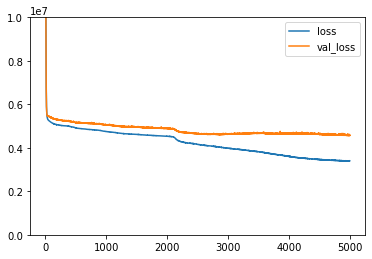

In [27]:
losses.plot()
plt.ylim(0,10000000)

## model ewaluation

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [29]:
predictions = model.predict(X_test)

In [30]:
mean_absolute_error(y_test,predictions)

1308.0060243456924

In [31]:
np.sqrt(mean_squared_error(y_test,predictions))

2136.858528332004

In [32]:
r2_score(y_test,predictions)

0.7281819895876187

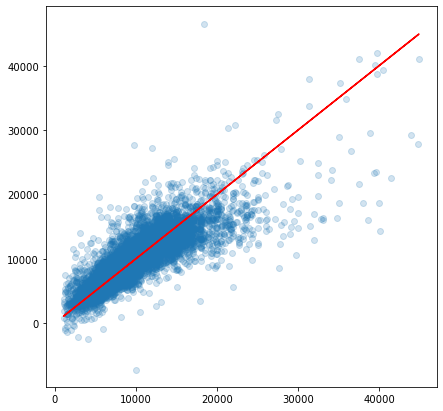

In [33]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Our predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [34]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

<AxesSubplot:ylabel='Count'>

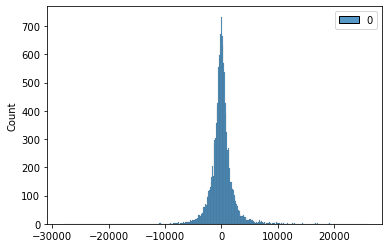

In [35]:
# plt.xlim(-200000,200000)

sns.histplot(errors)

In [36]:
predictions.reshape(y_test.shape[0])[:20]

array([12329.229 , 10408.408 ,  8602.798 , 14285.9375,  3008.7502,
        5532.385 ,  7524.282 ,  4914.515 , 14095.013 ,  8694.143 ,
       10956.824 , 12907.334 , 11535.654 ,  5089.5923,  5230.06  ,
        8895.652 ,  6249.89  ,  5105.948 ,  8148.5654,  4825.232 ],
      dtype=float32)

In [37]:
y_test[:20]

array([ 8726.88051861,  9982.42530756, 10000.        , 11115.00139159,
        3192.96621934,  6408.09443508,  8226.42073779,  6189.18918919,
       14833.33333333,  9987.65570643, 10207.61245675, 15823.52941176,
        8981.81818182,  5068.79073135,  5105.52542373,  7200.        ,
        8500.        ,  7287.75356875,  9131.09756098,  4469.3877551 ])

In [38]:
predictions.reshape(y_test.shape[0])[:20]/y_test[:20]

array([1.41278759, 1.04267329, 0.86027979, 1.28528436, 0.94230569,
       0.8633432 , 0.91464836, 0.7940483 , 0.95022557, 0.87048881,
       1.07339736, 0.81570512, 1.28433398, 1.00410385, 1.02439213,
       1.23550727, 0.73528119, 0.70062032, 0.89239715, 1.0796181 ])

## saving data

In [41]:
from datetime import datetime
from tensorflow.keras.models import load_model
timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")
model.save('models_ann\\' + '700_' + timestamp)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models_ann\700_2021-01-11--23-23\assets


In [42]:
import joblib
joblib.dump(scaler, 'scaler_700')

['scaler_700']